# __Analisis de Evasion de Clientes__

## Librerias

In [41]:
import pandas as pd
import numpy as np

In [42]:
import numexpr
print(numexpr.__version__)

2.11.0


## Extraccion de datos

### Importar Datos

In [43]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Como vemos, hay varias variables que contienen diccionarios en sus valores. Por tanto, debemos expandirlas

In [44]:
# expandir cada variable
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [45]:
# seleccionar variables no expandidas de df
df = df[['customerID', 'Churn']]

In [46]:
# unir todos los dfs en uno
df_exp = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)
df_exp.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Contexto de los datos

Se tratan de datos de los clientes de una empresa cuya informacion de cada variable se interpreta como:

- _customerID_: número de identificación único de cada cliente
- _Churn_: si el cliente dejó o no la empresa
- _gender_: género (masculino y femenino)
- _SeniorCitizen_: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- _Partner_: si el cliente tiene o no una pareja
- _Dependents_: si el cliente tiene o no dependientes
- _tenure_: meses de contrato del cliente
- _PhoneService_: suscripción al servicio telefónico
- _MultipleLines_: suscripción a más de una línea telefónica
- _InternetService_: suscripción a un proveedor de internet
- _OnlineSecurity_: suscripción adicional de seguridad en línea
- _OnlineBackup_: suscripción adicional de respaldo en línea
- _DeviceProtection_: suscripción adicional de protección del dispositivo
- _TechSupport_: suscripción adicional de soporte técnico, menor tiempo de espera
- _StreamingTV_: suscripción de televisión por cable
- _StreamingMovies_: suscripción de streaming de películas
- _Contract_: tipo de contrato
- _PaperlessBilling_: si el cliente prefiere recibir la factura en línea
- _PaymentMethod_: forma de pago
- _Charges.Monthly_: total de todos los servicios del cliente por mes
- _Charges.Total_: total gastado por el cliente

### Tipo de datos

In [47]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


> El conjunto de datos esta conformado por 7267 registros y 21 variables.

> Todas las variables tienen 7267 registros lo que indica la ausencia de valores faltantes.

> Las variables 'SeniorCitizen' y 'tenure' son de tipo entero, la variable 'Charges.Monthly' es de tipo float y el resto de variables son de tipo object.

> La variable 'Charges.Total' y 'Churn' en la practica son de tipo numerico. Sin embargo, Pandas las detecta de tipo object lo que sugiere un problema con la consistencia de los datos.

## Consistencia de los datos

### Registros duplicados

In [48]:
# verificar registros duplicados
df_exp.duplicated().sum()

0

> No hay registros duplicados en el dataframe.

### Tratar valores vacios

Verificamos los valores de 'Churn' y 'Charges.Total'

In [49]:
print('Charges.Total: ',df_exp['Charges.Total'].unique())
print('Churn: ',df_exp.Churn.unique())

Charges.Total:  ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
Churn:  ['No' 'Yes' '']


> Los valores de _Churn_ y _Charges.Total_ presentan valores vacios por lo que procedemos a tratarlos

__Churn__

In [50]:
# registros con valores vacios en _Churn_
df_exp[df_exp['Churn'] == ''].shape

(224, 21)

> Hay 224 registros con valores vacios en _Churn_ lo que representa el 3% de los registros totales. Como la variable objetivo es _Churn_, sin esta informacion tales registros no aportan al analisis por tanto los eliminamos.

In [51]:
# elimina registros con Churn vacios
df_exp = df_exp[df_exp['Churn'] != '']
df_exp.shape

(7043, 21)

In [52]:
# verificar que Churn este libre de valores vacios
print(df_exp.Churn.unique())

['No' 'Yes']


__Charges.Total__

In [53]:
# registros vacios en Charges.Total
df_exp[df_exp['Charges.Total'] == ' ']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


> Hay 11 registros con valores vacios en Charges.Total lo que representa el 0.1% de los registros totales. Al visualizarlos, nos damos cuenta que corresponden a clientes con contratos largos pero que no tienen ni el primer mes cumplido por lo que no aportan informacion relevante al estudio. Los eliminamos

In [54]:
# elimina registros con Charges.Total vacios
df_exp = df_exp[df_exp['Charges.Total'] != ' ']
df_exp.shape

(7032, 21)

In [55]:
# verificar que Churn este libre de valores vacios
print(df_exp['Charges.Total'].unique())

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [56]:
import numpy as np 

# convertir a tipo entero
df_exp['Charges.Total'] = df_exp['Charges.Total'].astype(np.float64)

# verificar tipo
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

### Columna de cuentas diarias

In [57]:
# crear columna de gasto diario de cada cliente
df_exp['Cuentas_Diarias'] = (df_exp['Charges.Monthly'])/(df_exp['tenure']*30)
df_exp.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0.242963
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0.221852
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0.615833
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,0.251282
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0.932222


### Estandarizacion de los datos

Vamos a realizar las conversiones de los valores de las variables necesarias para mejorar la interpretacion de los resultados.

__Valores Unicos por variable__

In [58]:
# verificar valores de variables de tipo object
print('gender: ',df_exp.gender.unique())
print('SeniorCitizen: ',df_exp.SeniorCitizen.unique())
print('Partner: ',df_exp.Partner.unique())
print('Dependents: ',df_exp.Dependents.unique())
print('PhoneService: ',df_exp.PhoneService.unique())
print('MultipleLines: ',df_exp.MultipleLines.unique())
print('InternetService: ',df_exp.InternetService.unique())
print('OnlineSecurity: ',df_exp.OnlineSecurity.unique())
print('OnlineBackup: ',df_exp.OnlineBackup.unique())
print('DeviceProtection: ',df_exp.DeviceProtection.unique())
print('TechSupport: ',df_exp.TechSupport.unique())
print('StreamingTV: ',df_exp.StreamingTV.unique())
print('StreamingMovies: ',df_exp.StreamingMovies.unique())
print('Contract: ',df_exp.Contract.unique())
print('PaperlessBilling: ',df_exp.PaperlessBilling.unique())
print('PaymentMethod: ',df_exp.PaymentMethod.unique())
print('Charges.Total: ',df_exp['Charges.Total'].unique())
print('Churn: ',df_exp.Churn.unique())

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['Yes' 'No']
PhoneService:  ['Yes' 'No']
MultipleLines:  ['No' 'Yes' 'No phone service']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['Yes' 'No' 'No internet service']
StreamingTV:  ['Yes' 'No' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total:  [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Churn:  ['No' 'Yes']


__Cambiar nombre de las variables__

In [59]:
nombres_nuevos = {
    'Churn': 'cancelacion',
    'gender': 'genero',
    'SeniorCitizen': 'jubilado',
    'Partner': 'en_pareja',
    'Dependents': 'dependientes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'multiples_lineas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_efectivo',
    'StreamingTV': 'streaming_TV',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturacion_electronica',
    'Charges.Monthly': 'cuenta_mensual',
    'Charges.Total': 'cuentas_total',
    'PaymentMethod': 'metodo_pago',
    'Cuentas_Diarias': 'cuentas_diarias'
}

df_exp.rename(columns=nombres_nuevos, inplace=True)

__customerID__

Vamos a omitir customer_ID ya que son identificadores de los clientes que a nivel general no aporta informacion relevante.

In [ ]:
# eliminar customerID
df_exp = df_exp.drop('customerID', axis=1)

__genero__

In [60]:
# renombrar valores de genero
df_exp['genero'] = df_exp['genero'].apply(lambda x: x.replace('Female', 'Femenino').replace('Male', 'Masculino'))
df_exp['genero'].unique()

array(['Femenino', 'Masculino'], dtype=object)

__jubilado__

In [61]:
df_exp['jubilado'] = df_exp['jubilado'].map({0:'No', 1:'Si'})
df_exp['jubilado'].unique()

array(['No', 'Si'], dtype=object)

__cancelacion__

In [62]:
# convertir valores de churn a binario
# 0:No esta con la empresa. 1: Sigue en la empresa
df_exp['cancelacion'] = df_exp['cancelacion'].replace({'Yes':'1', 'No':'0'}).astype(np.int64)
df_exp['cancelacion'].unique()

array([0, 1])

__en_pareja__

In [63]:
df_exp['en_pareja'] = df_exp['en_pareja'].map({'Yes':'Si', 'No':'No'})
df_exp.en_pareja.unique()

array(['Si', 'No'], dtype=object)

__dependientes__

In [ ]:
df_exp['dependientes'] = df_exp['dependientes'].replace({'Yes':'Si', 'No':'No'})
print(df_exp.dependientes.unique())

__facturacion_electronica__

In [ ]:
df_exp['facturacion_electronica'] = df_exp['facturacion_electronica'].replace({'Yes':'Si', 'No':'No'})
print(df_exp.facturacion_electronica.unique())

__servicio_telefonico__

In [ ]:
df_exp['servicio_telefonico'] = df_exp['servicio_telefonico'].replace({'Yes':'Si', 'No':'No'})
print(df_exp.servicio_telefonico.unique())

['Si' 'No']
['Si' 'No']
['Si' 'No']


__multiples_lineas__

In [ ]:
# agrupamiento de los valores de servicio_telefonico y multiples_lineas
df_exp.groupby(['servicio_telefonico', 'multiples_lineas']).size()

servicio_telefonico  multiples_lineas
No                   No phone service     680
Si                   No                  3385
                     Yes                 2967
dtype: int64

> Los clientes que tienen servicio telefonico necesariamente tienen al menos 1 linea. Los que no tienen servicio telefonico, no tienen linea telefonica. Por tanto, los datos son consistentes.

__servicio_internet__

In [ ]:
df_exp['servicio_internet'] = df_exp['servicio_internet'].replace({'Fiber optic':'Fibra_optica'})
df_exp['servicio_internet'].unique()

array(['DSL', 'Fibra_optica', 'No'], dtype=object)

__seguridad_online__

In [69]:
df_exp['seguridad_online'] = df_exp['seguridad_online'].replace({'Yes': 'Si', 'No internet service': 'Sin internet'})
df_exp.seguridad_online.unique()

array(['No', 'Si', 'Sin internet'], dtype=object)

In [70]:
df_exp.groupby(['servicio_internet', 'seguridad_online']).size()

servicio_internet  seguridad_online
DSL                No                  1240
                   Si                  1176
Fiber optic        No                  2257
                   Si                   839
No                 Sin internet        1520
dtype: int64

Los clientes que no tienen servicio de internet, no cuentan con seguridad online.

__seguridad_online, respaldo_online, proteccion_dispositivo, soporte_efectivo, streaming_tv, streaming_peliculas__

In [ ]:
lista = ['seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 'soporte_efectivo', 'Streaming_TV', 'Streaming_peliculas']

df_exp[lista] = df_exp[lista].replace({'Yes': 'Si', 'No internet service': 'Sin internet'})
print(df_exp.seguridad_online.unique())
print(df_exp.respaldo_online.unique())
print(df_exp.proteccion_dispositivo.unique())
print(df_exp.soporte_efectivo.unique())
print(df_exp.Streaming_TV.unique())
print(df_exp.Streaming_peliculas.unique())

['No' 'Si' 'Sin internet']
['Si' 'No' 'Sin internet']
['No' 'Si' 'Sin internet']
['Si' 'No' 'Sin internet']
['Si' 'No' 'Sin internet']
['No' 'Si' 'Sin internet']


__tipo_contrato__

In [ ]:
df_exp['tipo_contrato'] = df_exp['tipo_contrato'].replace(
    {'One year':'Un year',
     'Month-to-month':'mes a mes',
     'Two year':'Dos years'
     }
)

df_exp.tipo_contrato.unique()

array(['Un year', 'mes a mes', 'Dos years'], dtype=object)

__metodo_pago__

In [ ]:
df_exp['metodo_pago'] = df_exp['metodo_pago'].replace(
    {'Mailed check':'Cheque por correo',
     'Electronic check': 'Cheque electronico',
     'Credit card (automatic)':'Tarjeta de credito',
     'Bank transfer (automatic)':'Transferencia'
     }
    )

df_exp.metodo_pago.unique()

array(['Cheque por correo', 'Cheque electronico', 'Tarjeta de credito',
       'Transferencia'], dtype=object)

In [ ]:
df_exp.head()

,cancelacion,genero,jubilado,en_pareja,dependientes,meses_contrato,servicio_telefonico,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_efectivo,Streaming_TV,Streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cuenta_mensual,cuentas_total,cuentas_diarias
0,0,Femenino,No,Si,Si,9,Si,DSL,No,Si,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,0.242963
1,0,Masculino,No,No,No,9,Si,DSL,No,No,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,0.221852
2,1,Masculino,No,No,No,4,Si,Fibra_optica,No,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,0.615833
3,1,Masculino,Si,Si,No,13,Si,Fibra_optica,No,Si,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,0.251282
4,1,Femenino,Si,Si,No,3,Si,Fibra_optica,No,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,0.932222


In [ ]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cancelacion              7032 non-null   int64  
 1   genero                   7032 non-null   object 
 2   jubilado                 7032 non-null   object 
 3   en_pareja                7032 non-null   object 
 4   dependientes             7032 non-null   object 
 5   meses_contrato           7032 non-null   int64  
 6   servicio_telefonico      7032 non-null   object 
 7   servicio_internet        7032 non-null   object 
 8   seguridad_online         7032 non-null   object 
 9   respaldo_online          7032 non-null   object 
 10  proteccion_dispositivo   7032 non-null   object 
 11  soporte_efectivo         7032 non-null   object 
 12  Streaming_TV             7032 non-null   object 
 13  Streaming_peliculas      7032 non-null   object 
 14  tipo_contrato            7032

## Carga y Analisis

Resumen estadistico variables cualitativas 

In [ ]:
var_categoricas = df_exp.select_dtypes(include=['object', 'category']).columns
df_exp[var_categoricas].describe()

,genero,jubilado,en_pareja,dependientes,servicio_telefonico,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_efectivo,Streaming_TV,Streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,Masculino,No,No,No,Si,Fibra_optica,No,No,No,No,No,No,mes a mes,Si,Cheque electronico
freq,3549,5890,3639,4933,6352,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [ ]:
# dataframe con variables numericas
var_numericas = df_exp.select_dtypes(include=['number']).columns
df_exp[var_numericas].describe()

,cancelacion,jubilado,en_pareja,dependientes,meses_contrato,servicio_telefonico,facturacion_electronica,cuenta_mensual,cuentas_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.287336
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.545069
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.008935
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.042590
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.071576
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,0.220374
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.415000


### Analisis estadistico variables numericas

Analicemos las variables numericas de aquellos clientes que mantienen el servicio con la empresa.

In [ ]:
# estadistica de clientes que mantienen el servicio
df_num[df_num['cancelacion'] == 0].describe()

,meses_contrato,cuenta_mensual,cuentas_total,cuentas_diarias,cancelacion
count,5163.00000,5163.000000,5163.000000,5163.000000,5163.0
mean,37.65001,61.307408,2555.344141,0.160736,0.0
std,24.07694,31.094557,2329.456984,0.328574,0.0
min,1.00000,18.250000,18.800000,0.008935,0.0
25%,15.00000,25.100000,577.825000,0.036449,0.0
50%,38.00000,64.450000,1683.600000,0.055444,0.0
75%,61.00000,88.475000,4264.125000,0.114517,0.0
max,72.00000,118.750000,8672.450000,3.195000,0.0


> La mitad de los clientes que mantienen el servicio tienen 38 meses de contrato (mas de 3 años).

> La mitad de los clientes que mantienen el servicio pagan una cuota de mas de 60 mensual. Si se compara dicho valor con el valor minimo y maximo nos damos cuenta que es una tarifa alta.

> Muchos de estos clientes acumulan gastos totales grandes.

> Diariamente, la mayoria de los clientes generan costos de 0.05. Pero tambien hay ciertos clientes con costos diarios de mas de 3.

Analicemos las variables numericas de los clientes que cancelan.

In [ ]:
# estadistica de clientes que cancelan el servicio
df_num[df_num['cancelacion'] == 1].describe()

,meses_contrato,cuenta_mensual,cuentas_total,cuentas_diarias,cancelacion
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,17.979133,74.441332,1531.796094,0.637061,1.0
std,19.531123,24.666053,1890.822994,0.808238,0.0
min,1.000000,18.850000,18.850000,0.010601,1.0
25%,2.000000,56.150000,134.500000,0.090000,1.0
50%,10.000000,79.650000,703.550000,0.249306,1.0
75%,29.000000,94.200000,2331.300000,0.817500,1.0
max,72.000000,118.350000,8684.800000,3.415000,1.0


> La mitad de los clientes que cancelan el servicio lo hacen a los 10 meses (antes del primer año) mucho antes de aquellos que mantienen el servicio (38 meses)

> La mitad de los clientes que cancelan, pagan 79.65 por mes mucho mas que aquellos que mantienen el servicio (64.45).

> Los clientes que cancelan acumulan menos gasto total lo cual es logico ya que tienen contratos mas cortos.

> La mitad de los clientes que cancelan tienen un gasto diario mucho mayor que aquellos que mantienen el servicio (0.24 >> 0.05)

In [ ]:
plt.boxplot()
plt.show()

NameError: name 'plt' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x78e4bc654400>,
 'caps': [<matplotlib.lines.Line2D at 0x78e4bc6549a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e4bc654130>],
 'medians': [<matplotlib.lines.Line2D at 0x78e4bc654f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e4bc655210>],
 'means': []}

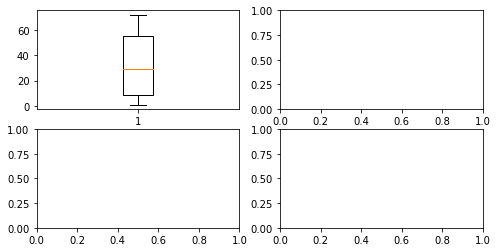

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(8, 4))

axs[0,0].boxplot(data=df_num, )
#axs[0,1].boxplot(data=df_num, x='cancelacion', y='cuenta_mensual')
#axs[1,0].boxplot(data=df_num, x='cancelacion', y='cuentas_total')
#axs[1,1].boxplot(data=df_num, x='cancelacion', y='cuentas_diarias')

### Analisis estadistico variables categoricas

Para las variables categoricas, seleccionamos los registros de los cliente que cancelan y obtenemos el conteo de cada valor.

In [ ]:
# dataframe de variables categoricas de clientes que cancelan
df_bin_1 = df_bin[df_bin['cancelacion'] == 1]
df_bin_1.head()

,cancelacion,genero,jubilado,en_pareja,dependientes,servicio_telefonico,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_efectivo,Streaming_TV,Streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago
2,1,1,0,0,0,1,1,1,1,2,1,1,1,0,1,Electronic check
3,1,1,1,1,0,1,1,1,2,2,1,2,2,0,1,Electronic check
4,1,0,1,1,0,1,1,1,1,1,2,2,1,0,1,Mailed check
18,1,1,1,0,0,1,1,2,1,2,1,1,2,1,0,Credit card (automatic)
19,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,Electronic check


In [ ]:
# conteo de valores de cada variable categorica
for col in df_bin_1.columns:
    print('-'*10)
    print(col)
    print(df_bin_1[col].value_counts(normalize=True))

----------
cancelacion
1    1.0
Name: cancelacion, dtype: float64
----------
genero
0    0.502408
1    0.497592
Name: genero, dtype: float64
----------
jubilado
0    0.745318
1    0.254682
Name: jubilado, dtype: float64
----------
en_pareja
0    0.642055
1    0.357945
Name: en_pareja, dtype: float64
----------
dependientes
0    0.825575
1    0.174425
Name: dependientes, dtype: float64
----------
servicio_telefonico
1    0.909042
0    0.090958
Name: servicio_telefonico, dtype: float64
----------
servicio_internet
1    0.93954
0    0.06046
Name: servicio_internet, dtype: float64
----------
seguridad_online
1    0.781701
2    0.157838
0    0.060460
Name: seguridad_online, dtype: float64
----------
respaldo_online
1    0.659711
2    0.279829
0    0.060460
Name: respaldo_online, dtype: float64
----------
proteccion_dispositivo
1    0.64794
2    0.29160
0    0.06046
Name: proteccion_dispositivo, dtype: float64
----------
soporte_efectivo
1    0.773676
2    0.165864
0    0.060460
Name: soport

> Hay 1869 clientes que cancelan el servicio con la empresa.

> Presentan similares proporciones entre hombre y mujeres.

> 74% no son jubilados.

> La mayoria son solteros (64%).

> El 82% no poseen dependientes.

> El 90% cuenta con servicio telefonico.

> El 93% cuenta con servicion de internet.

> El 78% no cuenta con seguridad en linea.

> La mayoria tampoco no cuenta con respaldo en linea (66%)

> La mayoria no esta suscrito a proteccion del dispositivo (65%)

> La mayoria no cuentan con un soporte mejorado (77%)

> La proporcion entre los que cuentan con servicio de TV por cable y los que no es muy similar. Tambien ocurre lo mismo con el servicio de streaming de peliculas.

> El 88% tienen un contrato de tipo mes a mes.

> La mayoria prefiere recibir la factura electronica.

> El metodo de pago preferido por este grupo es Cheque Electronico.



Ahora, procedemos a obtener la misma estadistica para clientes que mantienen el servicio con la empresa.

In [ ]:
# dataframe de variables categoricas de clientes que cancelan
df_bin_0 = df_bin[df_bin['cancelacion'] == 0]
df_bin_0.head()

,cancelacion,genero,jubilado,en_pareja,dependientes,servicio_telefonico,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_efectivo,Streaming_TV,Streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago
0,0,0,0,1,1,1,1,1,2,1,2,2,1,1,1,Mailed check
1,0,1,0,0,0,1,1,1,1,1,1,1,2,0,0,Mailed check
5,0,0,0,0,1,1,1,1,1,1,2,2,2,0,1,Credit card (automatic)
6,0,0,1,1,0,1,1,2,2,2,2,2,2,2,1,Bank transfer (automatic)
7,0,1,0,1,0,1,1,2,1,1,2,1,1,2,1,Credit card (automatic)


In [ ]:
# conteo de valores de cada variable categorica
for col in df_bin_0.columns:
    print('-'*10)
    print(col)
    print(df_bin_0[col].value_counts(normalize=True))

----------
cancelacion
0    1.0
Name: cancelacion, dtype: float64
----------
genero
1    0.507263
0    0.492737
Name: genero, dtype: float64
----------
jubilado
0    0.871005
1    0.128995
Name: jubilado, dtype: float64
----------
en_pareja
1    0.5276
0    0.4724
Name: en_pareja, dtype: float64
----------
dependientes
0    0.656595
1    0.343405
Name: dependientes, dtype: float64
----------
servicio_telefonico
1    0.90122
0    0.09878
Name: servicio_telefonico, dtype: float64
----------
servicio_internet
1    0.727484
0    0.272516
Name: servicio_internet, dtype: float64
----------
seguridad_online
1    0.394344
2    0.333140
0    0.272516
Name: seguridad_online, dtype: float64
----------
respaldo_online
2    0.368390
1    0.359094
0    0.272516
Name: respaldo_online, dtype: float64
----------
proteccion_dispositivo
1    0.364710
2    0.362774
0    0.272516
Name: proteccion_dispositivo, dtype: float64
----------
soporte_efectivo
1    0.392408
2    0.335077
0    0.272516
Name: soporte

> La proporcion en cuanto al genero son similares.

> La mayoria no son jubilados.

> La proporcion entre solteros y en pareja son similares.

> El 65% no tiene dependientes.

> La mayoria tiene servicio telefonico (90%)

> El 72% tiene servicio de internet.

> La cantidad de clientes que no tienen seguridad en linea es ligeramente mayor de los que si tienen (39%-33%)

> La proporcion de los que tienen respaldo online de los que no es muy similar. Lo mismo ocurre para proteccion del dispositivo, Streaming TV y streaming de peliculas.

> La cantidad de clientes que no tienen soporte mejorado es ligeramente mayor de los que si tiene (39%-33%)

> La mayoria tienen un tipo de contrato mes a mes.

> El 53% prefieren factura electronica.

> La proporcion en cuanto a los metodos de pagos son muy similares.

Para entender visualmente las conclusiones obtenidas a partir de la estadistica descriptiva, vamos a crear graficos tanto para las variables numericas como para las categoricas.

### Visualizacion variables numericas

In [ ]:
df_num[df_num['cancelacion'] == 1]['meses_contrato'].median()

10.0

In [ ]:
df_num[df_num['cancelacion'] == 0]['meses_contrato'].median()

38.0

In [ ]:
cols = ['cuenta_mensual', 'cuentas_total', 'cuentas_diarias']


def resumen_estadistico(df, columnas):
    
    stats = []

    for col in columnas:
        cancelan = df[df['cancelacion'] == 1][col]
        no_cancelan = df[df['cancelacion'] == 0][col]

        stats.append(['Media', col, 'Cancelaron', cancelan.mean()])
        stats.append(['Media', col, 'No cancelaron', no_cancelan.mean()])
        stats.append(['Mediana', col, 'Cancelaron', cancelan.median()])
        stats.append(['Mediana', col, 'No cancelaron', no_cancelan.median()])

    new_df = pd.DataFrame(stats, columns=['estadistico', 'variable', 'grupo', 'valor'])
    return new_df

In [ ]:
df_resumen = resumen_estadistico(df_num, cols)

In [ ]:
df_resumen

,estadistico,variable,grupo,valor
0,Media,cuenta_mensual,Cancelaron,74.441332
1,Media,cuenta_mensual,No cancelaron,61.307408
2,Mediana,cuenta_mensual,Cancelaron,79.650000
3,Mediana,cuenta_mensual,No cancelaron,64.450000
4,Media,cuentas_total,Cancelaron,1531.796094
5,Media,cuentas_total,No cancelaron,2555.344141
6,Mediana,cuentas_total,Cancelaron,703.550000
7,Mediana,cuentas_total,No cancelaron,1683.600000
8,Media,cuentas_diarias,Cancelaron,0.637061
9,Media,cuentas_diarias,No cancelaron,0.160736
